In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import os

In [2]:
def plot_PI(PI, PINC, y_test_true, title:str, resultFolder:str, saveflag:False,ind_show=None, color='darkorange', 
            style=['science'], figsize=(15,10), fontsize=20, lw=0.5, save_dpi=300):
    '''
    绘制预测区间图。

    input parameters:
    PI: the prediction intervals, ndarray or DataFrame, should be [N, len(PINC)*2].
    PINC: confidence levels of PIs, list or ndarray.
    y_test_true: the truth of the y_test, also the middle of the PIs, ndarray or DataFrame, [N, 1]
    title: the title of the picture, str.
    subFolder: the name of the picture, str. 
    ind_show: the range of PIs to show. Example & default: ind_show = range(0, 200).
    color: the PIs' color, str. Example & default: color = 'darkorange'.
    
    '''

    PI = np.array(PI)
    y_test_true = np.array(y_test_true)
    print(f'PI.shape = {PI.shape}')
    print(f'PINC: {PINC}')
    assert PI.shape[1] == len(PINC)*2
    assert y_test_true.ndim < 3
    
    alphas = np.linspace(0.2, 1, len(PINC)) #透明度
    x = np.arange(len(PI))
    if ind_show is None:
        ind_show = range(200)

    with plt.style.context(style):
        plt.figure(figsize=figsize, dpi=60)
        plt.rc('font', family='Times New Roman', weight = 'medium', size=fontsize)
        plt.plot(x[ind_show], y_test_true[ind_show], 'k' ,label='Ground truth')
        for i in range(len(PINC)):
            plt.plot(x[ind_show], PI[ind_show, i], color=color, lw=lw) 
            plt.plot(x[ind_show], PI[ind_show, -(i+1)], color=color, lw=lw) 
            plt.fill_between(x[ind_show], PI[ind_show, i], PI[ind_show, -(i+1)], color=color, alpha=alphas[i],label='{:.0f}\% confidence PI'.format(PINC[i]))

        plt.xlabel('Time')
        plt.ylabel('Wind power (kW)')
        plt.legend()
        plt.title(title)
        plt.tight_layout(pad=1)
        if saveflag:
            if not os.path.exists(resultFolder):
                os.makedirs(resultFolder)
            # plt.savefig('{}/{}.svg'.format(resultFolder, title), dpi=save_dpi, bbox_inches='tight')
            plt.savefig('{}/{}.png'.format(resultFolder, title), dpi=save_dpi, bbox_inches='tight')
        else:
            plt.show()

In [3]:
data = pd.read_excel('../result/结果总结.xlsx', sheet_name='Sheet2')
data.head()

,Date,模型,Step,RMSE,MAE,MAPE,SMAPE,R2,Score
0,2024_01_07_11_43_59,RNN,1,79.927925,49.061413,76.541233,153.082466,0.948826,64.494667
1,2024_01_07_11_43_59,RNN,2,98.274840,59.807945,149.689543,299.373817,0.919833,79.041397
2,2024_01_07_11_43_59,RNN,3,111.012695,67.496460,104.652393,209.304786,0.894743,89.254578
3,2024_01_07_11_43_59,RNN,4,120.270515,73.340440,121.631980,243.263936,0.872528,96.805481
4,2024_01_07_11_43_59,RNN,5,132.208200,83.294590,115.338600,230.677152,0.839446,107.751404


In [4]:
models = data['模型'].unique()
print(f'模型: {models}')

steps = data['Step'].unique()
print(f'Step: {steps}')

模型: ['RNN' 'ASTGCN' 'STGCN' 'LSTM' 'GRU' 'TCN' 'FASTGCN']
Step: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


<Figure size 1500x1000 with 0 Axes>

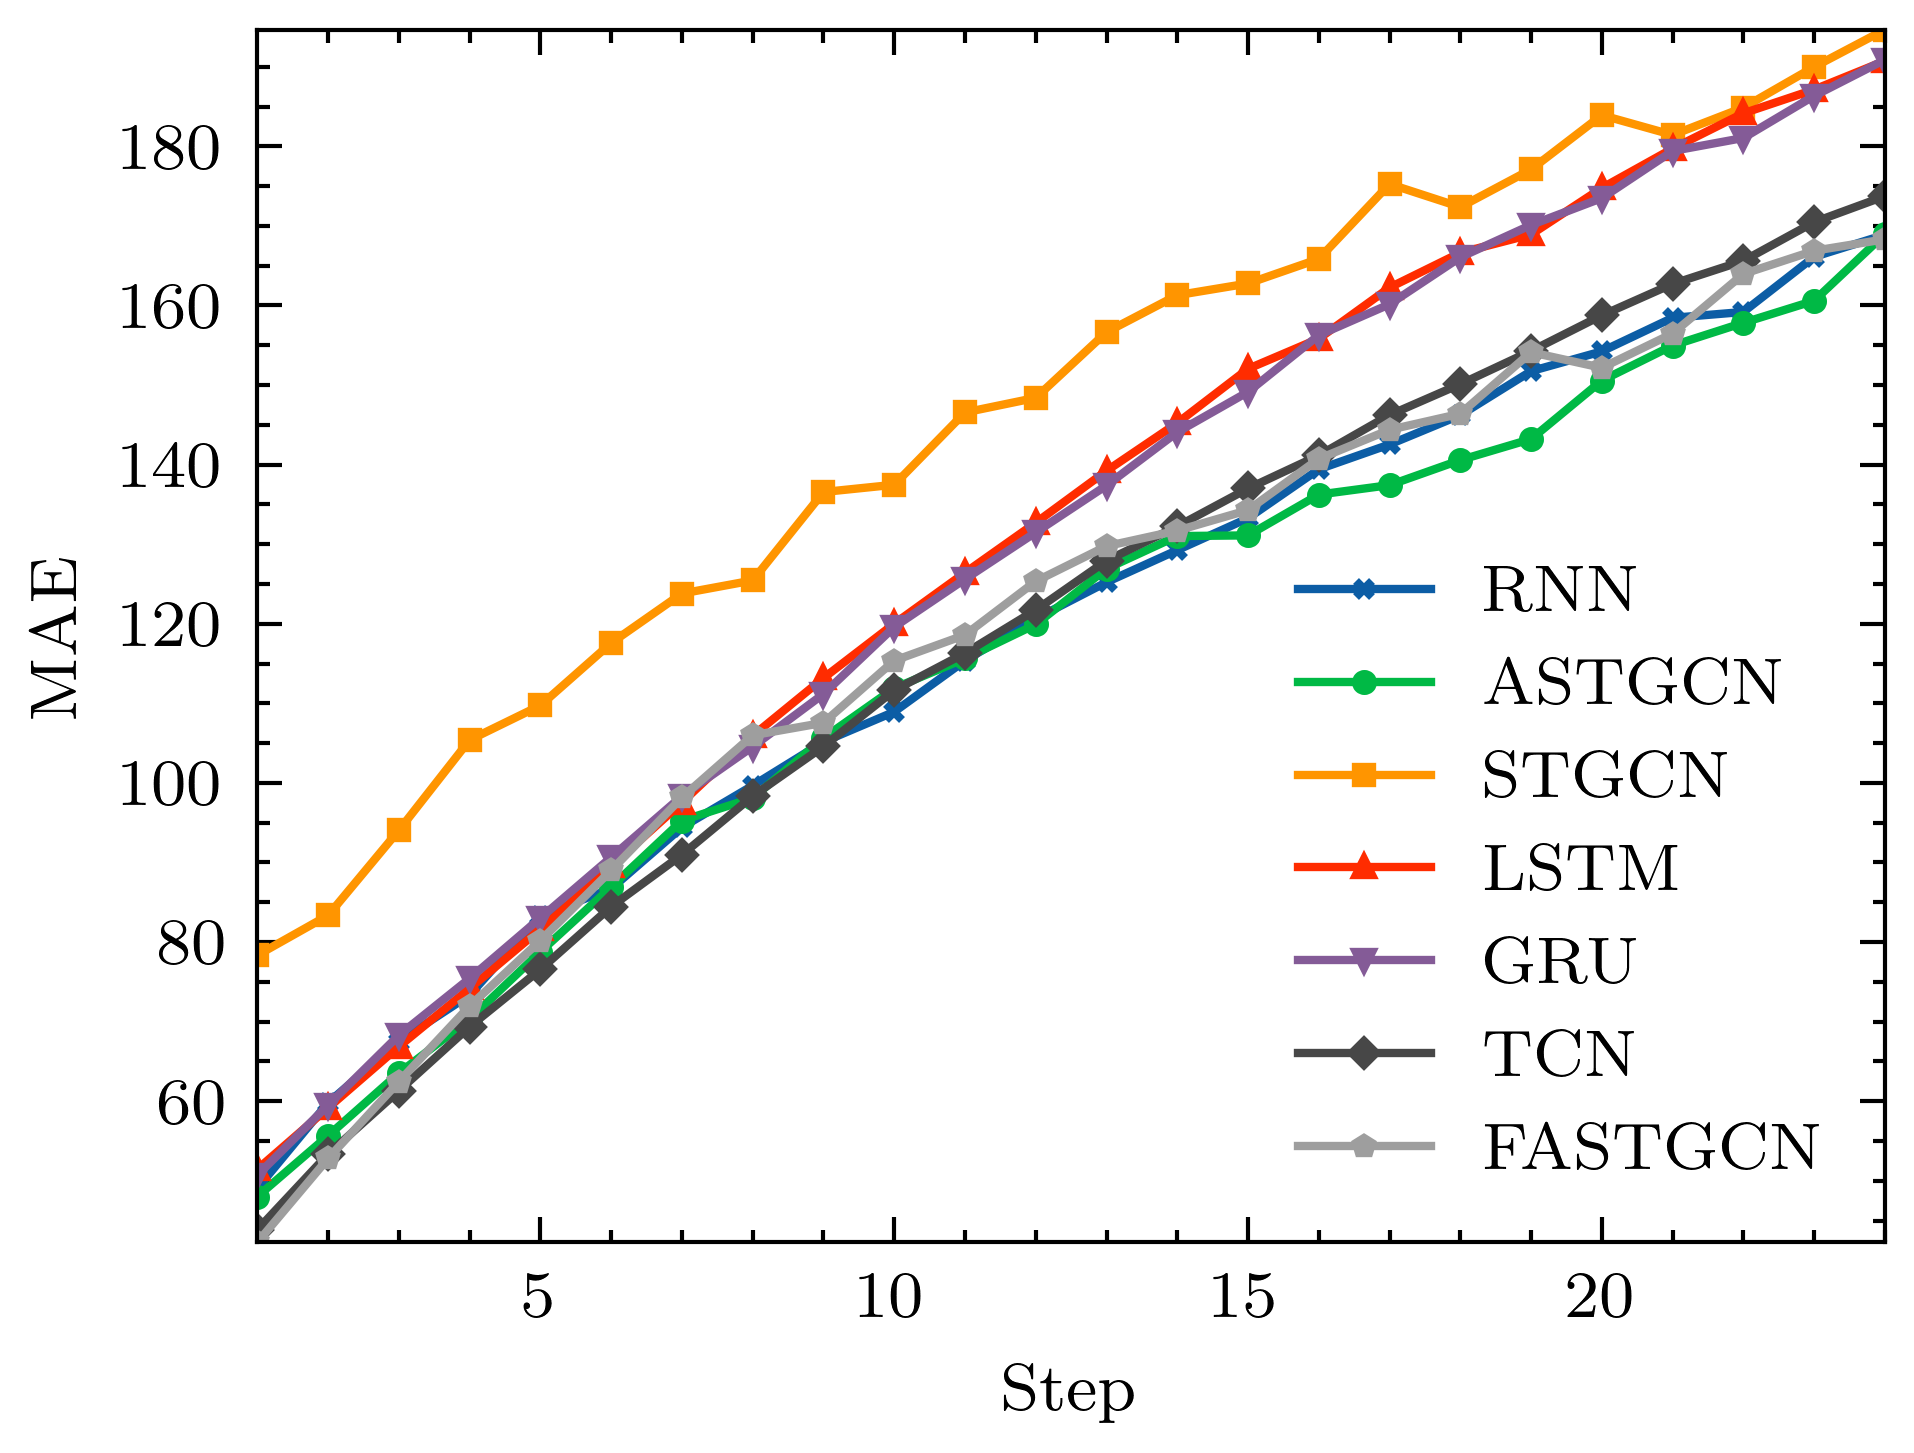

: 

In [19]:
markers = ['x', 'o', 's', '^', 'v', 'D', 'p', '*', 'h', 'H', 'd']


# plt.style.use(['science', 'ieee'])
plt.style.use('science')

# with plt.style.context(['science']):
plt.figure(figsize=(15, 10), dpi=100)
fig, ax = plt.subplots()        
for i, model in enumerate(models):               
    ax.plot(steps, data[data['模型']==model]['MAE'], label=model, marker=markers[i], lw=1, ms=2)       
ax.legend()        
ax.set(xlabel='Step')        
ax.set(ylabel='MAE')        
ax.autoscale(tight=True)     

plt.savefig('../images/MAE_steps.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

<Figure size 1500x1000 with 0 Axes>

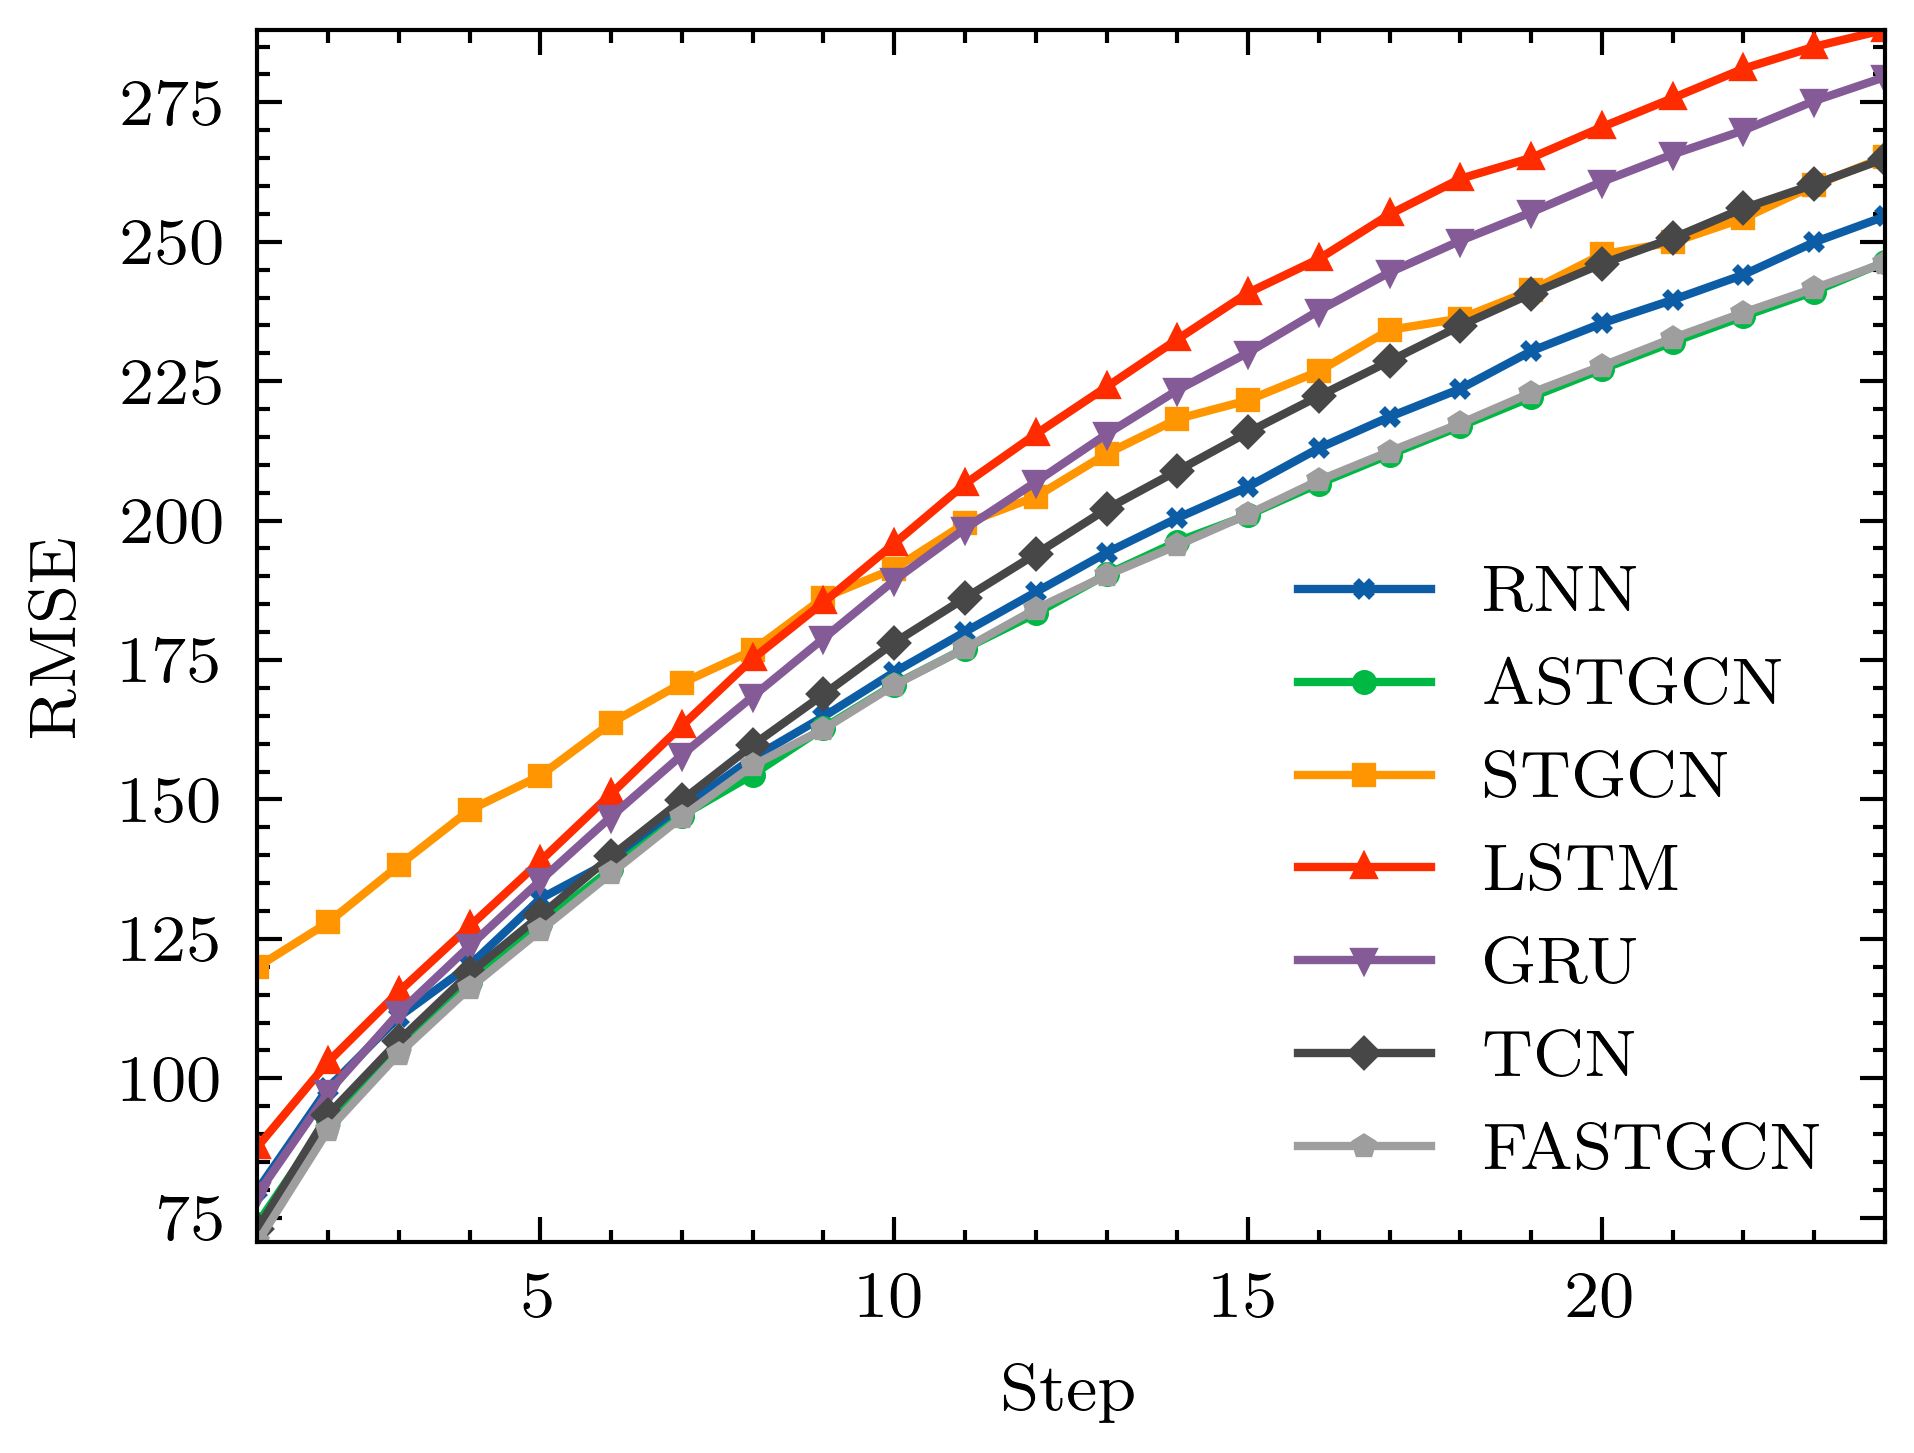

In [18]:
markers = ['x', 'o', 's', '^', 'v', 'D', 'p', '*', 'h', 'H', 'd']


# plt.style.use(['science', 'ieee'])
plt.style.use('science')

# with plt.style.context(['science']):
plt.figure(figsize=(15, 10), dpi=100)
fig, ax = plt.subplots()        
for i, model in enumerate(models):               
    ax.plot(steps, data[data['模型']==model]['RMSE'], label=model, marker=markers[i], lw=1, ms=2)       
ax.legend()        
ax.set(xlabel='Step')        
ax.set(ylabel='RMSE')        
ax.autoscale(tight=True)     

plt.savefig('../images/RMSE_steps.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()